In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
train_data = pd.read_csv(r"C:\Users\user\Downloads\siva\Hackthon\train_v9rqX0R.csv")
test_data = pd.read_csv(r"C:\Users\user\Downloads\siva\Hackthon\test_AbJTz2l.csv")

# EDA

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print('Train Data Shape :', train_data.shape)

Train Data Shape : (8523, 12)


In [5]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
import seaborn as sns

<AxesSubplot:ylabel='Item_Weight'>

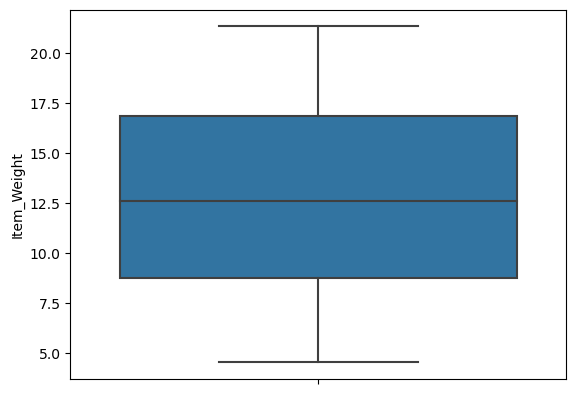

In [10]:
sns.boxplot(y= 'Item_Weight', data = train_data)

In [11]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
print('Test Data Shape :', test_data.shape)

Test Data Shape : (5681, 11)


In [13]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [15]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


<AxesSubplot:ylabel='Item_Weight'>

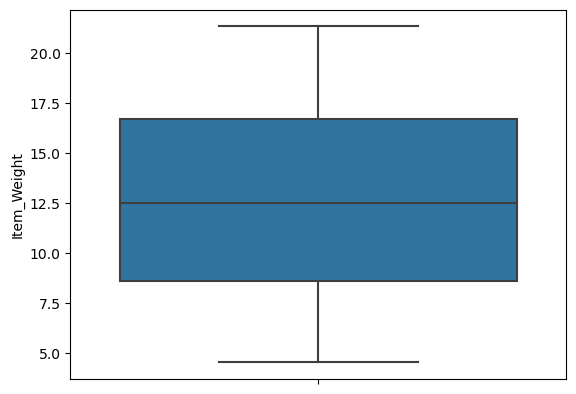

In [16]:
sns.boxplot(y='Item_Weight',data = test_data)

# Imputing Null Values

In [17]:
# Null values contained columns in train data
# Item_Weight, Outlet_Size

train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

In [18]:
mode_outlet_size=train_data['Outlet_Size'].mode()[0]

In [19]:
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(mode_outlet_size)

In [20]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())

In [22]:
mode_outlet_size = test_data['Outlet_Size'].mode()[0]

In [23]:
test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna(mode_outlet_size)

In [24]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [25]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [26]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [27]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [28]:
test_data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [29]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [30]:
test_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [31]:
train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [32]:
def col_classifier(x,q1,median,q3):
    if x< q1:
        return 1
    elif x>q1 and x<= median:
        return 2
    elif x>median and x<=q3:
        return 3
    elif x>q3:
        return 4

In [33]:
q1 = train_data['Item_Visibility'].quantile(0.25)
median = train_data['Item_Visibility'].quantile(0.50)
q3 = train_data['Item_Visibility'].quantile(0.75)

train_data['Item_Visibility'] = train_data['Item_Visibility'].apply(lambda x: col_classifier(x,q1,median,q3))
test_data['Item_Visibility'] = test_data['Item_Visibility'].apply(lambda x: col_classifier(x,q1,median,q3))

In [34]:
#It is not used for the predictions
train_data = train_data.drop(columns = ['Item_Identifier'])
test_data = test_data.drop(columns = ['Item_Identifier'])

In [35]:
train_data['Item_Outlet_Sales'] = np.log1p(train_data['Item_Outlet_Sales'])

In [36]:
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
num_cols = ['Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year']


In [37]:
col_trans = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

In [51]:
col_trans

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Identifier', 'Outlet_Size',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('num', StandardScaler(),
                                 ['Item_Visibility', 'Item_Weight',
                                  'Outlet_Establishment_Year'])])

In [38]:
model = RandomForestRegressor(random_state=42)

In [39]:
pipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('regressor', model)
])

In [52]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('num', StandardScaler(),
                                                  ['Item_Visibility',
                                                   'Item_Weight',
                                                   'Outlet_Establishment_Year'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [40]:
X = train_data.drop(columns=['Item_Outlet_Sales'])
y = train_data['Item_Outlet_Sales']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
param_dist = {
    'regressor__n_estimators': [100, 200, 300, 400, 500],
    'regressor__max_depth': [None, 10, 20, 30, 40],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [42]:
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=20, cv=3, verbose=2, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error'
)

In [43]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Item_Fat_Content',
                                                                                'Item_Type',
                                                                                'Outlet_Identifier',
                                                                                'Outlet_Size',
                                                                                'Outlet_Location_Type',
                                                                                'Outlet_Type']),
                                                                              ('num',
                                

In [44]:
y_pred = random_search.best_estimator_.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

In [45]:
print("Best Parameters:", random_search.best_params_)
print("RMSE on validation set:", rmse)

Best Parameters: {'regressor__n_estimators': 300, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': 40}
RMSE on validation set: 0.7226480888996673


# Predictions for Test Data

In [46]:
X_test = test_data
test_predictions = np.expm1(random_search.best_estimator_.predict(X_test))

# Submission file

In [47]:
test_data_original = pd.read_csv(r"C:\Users\user\Downloads\siva\Hackthon\test_AbJTz2l.csv")

In [49]:
submission = pd.DataFrame({
    'Item_Identifier': test_data_original['Item_Identifier'],
    'Outlet_Identifier': test_data_original['Outlet_Identifier'],
    'Item_Outlet_Sales': test_predictions
})

In [50]:
submission.to_csv(r"C:\Users\user\Downloads\siva\Hackthon\submission.csv",index = False)